# Part II - Ford go bike trip data
## by Javier Chapto

## Investigation Overview

> I'm most interested in figuring out what features are best for predicting trip duration.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_share = pd.read_csv('201902-fordgobike-tripdata.csv')

## Distribution of trip duration

> When the distribution of trip duration (min) is analyzed using a histogram with a standard scale, it is skewed to the right. However, when it is plotted with a logarithmic scale, the distribution is approximately normal.

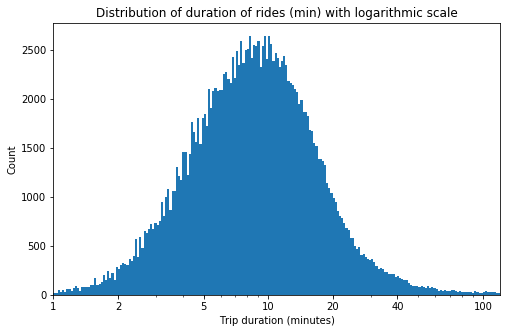

In [3]:
bike_share['duration_min'] = bike_share['duration_sec'] / 60
log_binsize = 0.01
bins = 10 ** np.arange(0, np.log10(bike_share['duration_min'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = bike_share, x = 'duration_min', bins = bins)
plt.title('Distribution of duration of rides (min) with logarithmic scale')
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 40, 100], ['1', '2', '5', '10', '20', '40','100'])
plt.xlabel('Trip duration (minutes)')
plt.ylabel('Count')
plt.xlim([0,120])
plt.show()

## Distributions of categorical variables

> Most of the rides are made by males, suscribers and not involved in the 'bike share for all trip' program.

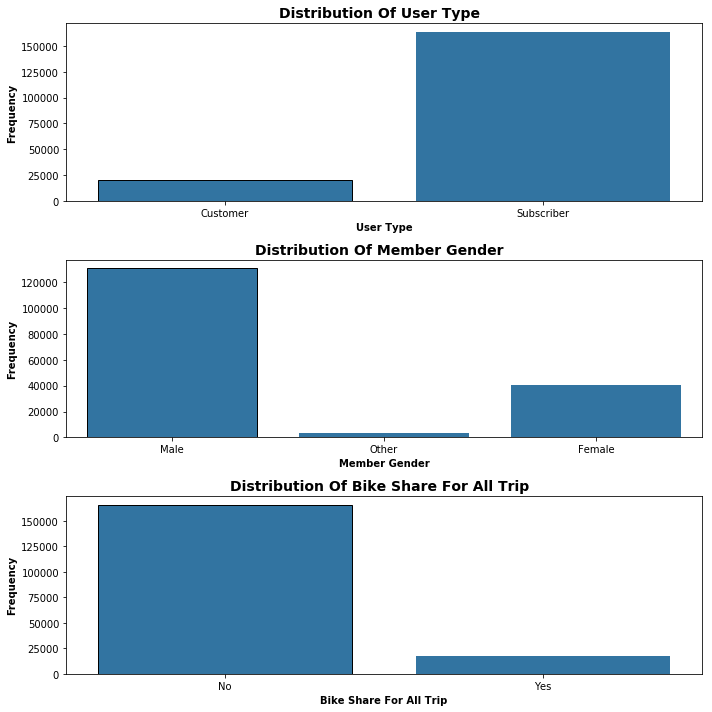

In [4]:
def myCountPlot(df,xVar,hue=None,color=0,palette=None,order=None,ax=None, figsize=[14,6]):
    if not ax:
        plt.figure(figsize=figsize)
        ax.plt.gca()
    sb.countplot(data=df, x= xVar,hue=hue,color=sb.color_palette()[color],palette=palette,order=order,edgecolor='black', ax=ax);
    xVar=xVar.replace("_"," ")
    if hue:
        hue=hue.replace("_"," ")
    ax.set_title(f'''Distribution of {xVar} {'by' if hue else ''} {hue if hue else ''}'''.title() , fontsize = 14, weight = "bold")
    ax.set_xlabel(xVar.title(), fontsize = 10, weight = "bold")
    ax.set_ylabel('Frequency'.title(), fontsize=10, weight="bold")
fig, ax = plt.subplots(nrows=3, figsize=[10,10])
myCountPlot(bike_share,'user_type', ax=ax[0])
myCountPlot(bike_share,'member_gender', ax=ax[1])
myCountPlot(bike_share,'bike_share_for_all_trip', ax=ax[2])
plt.tight_layout()

## Duration of rides (min) across gender and user type

> The longest rides are made by females whose user type is customer.

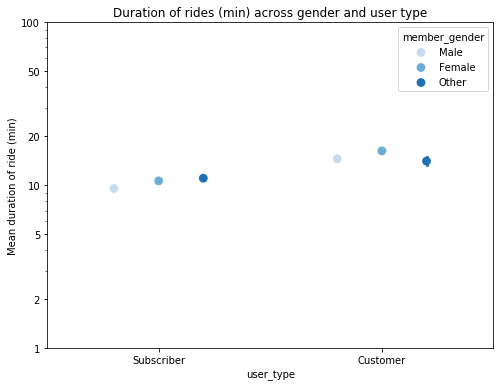

In [5]:
bike_share_no_nulls = bike_share[bike_share['member_birth_year'].notna()]
bike_no_outliers = bike_share_no_nulls['duration_min'] < 60
bike_share_no_nulls = bike_share_no_nulls.loc[bike_no_outliers,:]
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike_share_no_nulls, x = 'user_type', y = 'duration_min', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Duration of rides (min) across gender and user type')
plt.ylabel('Mean duration of ride (min)')
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100], ['1', '2', '5', '10', '20', '50', '100'])
ax.set_yticklabels([],minor = True)
plt.show();

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 295488 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/